In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def tf(x):
    return x**3 - 2*x + 4


def df(x):
    return 3*(x**2) - 2

In [38]:
def save(px, py, a1, b1, desc, f, name=None):
    x = np.linspace(a1, b1, desc)
    y = f(x[:]) 

    plt.figure(0)
    plt.plot(x, y)
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.text(0, 950, "x={0:.2},  f(x)={1:.2}".format(px, py))
    plt.scatter(px, py, c='orange', marker="o")
    if name:
        plt.savefig(name +'.jpg', dpi=220)

In [34]:
def first_method(a, b, N, f):
    if a < b and N > 0:
        xi = np.linspace(a, b, N)
        fx = f(xi)
        y_min = np.min(fx)
        ind = np.argwhere(fx == y_min)[0]
        return xi[ind[0]], y_min
    else:
        return None  

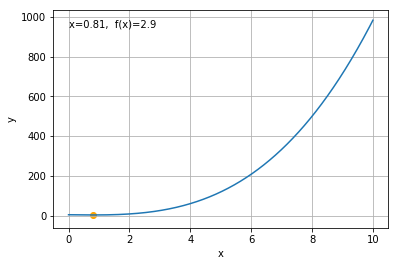

In [39]:
a1, b1 = 0., 10.

px, py = first_method(a1, b1, 1500, tf)#,'first')
save(px, py, 0., 10., 1000, tf)

In [40]:
def ditochomi(ak, bk, epsilon, f):
    xk = (ak + bk)/2
    L  = bk - ak

    while True:
        f_x = f(xk)
        yk = ak + (L / 4)
        zk = bk - (L / 4)
        f_y, f_z = f(yk), f(zk)

        if f_y < f_x:
            bk = xk
            xk = yk 
      
        elif f_y >= f_x:
            if f_z < f_x:
                ak = xk
                xk = zk
        
            elif f_z >= f_x:
                ak = yk
                bk = zk
        
        L_2 = abs(bk - ak)
        if L_2 <= epsilon:
            break
      
    return xk, f(xk)

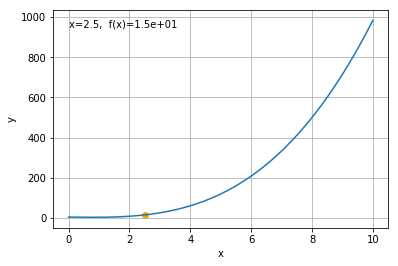

In [41]:
dx, dy = ditochomi(0., 10., .001, tf)  
save(dx, dy, 0., 10., 1000, tf) #, 'ditochimi')

In [48]:
def golden_ratio(a, b, epsilon, f):
    GC = (3 - 5**0.5)/2
    y = a + (b - a)*GC
    z = a + b - y

    while True:
        f_y, f_z = f(y), f(z)
        if f_y <= f_z:
            b = z
            y = a + b - y
            z = y 
        else:
            a = y
            y = z
            z = a + b - z
    
        delta = abs(a - b)
        if delta <= epsilon:
            break    
    return (a + b)/2, f((a + b)/2)

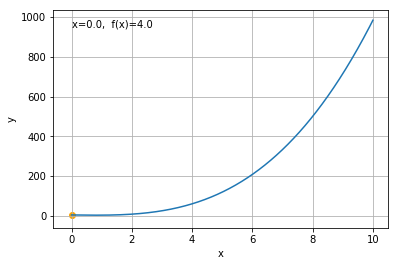

In [49]:
gx, gy = golden_ratio(0., 10., 0.001, tf)  
save(gx, gy, 0., 10., 1000, tf)#, 'golden')

In [55]:
def fib(n):
    return int((((1 + 5**0.5)/2)**n - ((1 - 5**0.5)/2)**n) / (5**0.5))
  
def fibonachi_search(a, b, lengt, epsilon, f):
    l = b - a
    n = abs(b - a) / lengt
    F_n = fib(n)
    k = 0
    y = a + (b-a) * fib(n - 2) / F_n
    z = a + (b-a) * fib(n - 1) / F_n

    while True :       
        f_y = f(y) 
        f_z = f(z)
    
        if f_y > f_z:
            a = y
            y = z 
            z = a + (b - a) * fib(n - k - 2) / fib(n - k - 1)
        else:
            b = z
            z = y
            y = a + (b - a) * fib(n - k - 3) / fib(n - k - 1)
      
        l = b - a
        k += 1
    
        if l > lengt:
            break
        
        if k == n - 3:
            z = y + epsilon
  
    x_out = (a + b) / 2
    return x_out, f(x_out)

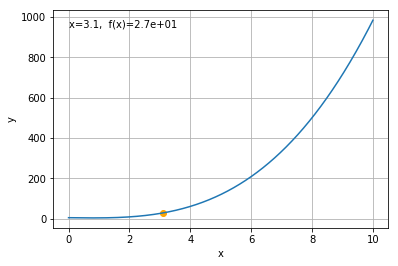

In [56]:
fx, fy = fibonachi_search(0.0, 10.0, 0.01, 0.001, tf)  
save(fx, fy, 0., 10., 1000, tf)#, 'fib')

In [46]:
def grad_search(x0, f, df, lr=0.01, epsilon=0.001, low_value=.01, max_iter=100):
    k_iter = 0
    xk = x0
  
    while k_iter < max_iter: # and k_epsilon > epsilon:
        x_k1 = xk - lr * df(xk)
        if abs(x_k1 - xk) > epsilon or abs(f(x_k1) - f(xk)) > epsilon:
            xk = x_k1
            k_iter += 1
        else:
            xk = x_k1
            break 
    return xk, f(xk)

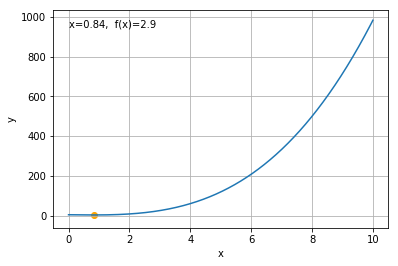

In [47]:
gsx1, gsy1 = grad_search(10., tf, df)  
save(gsx1, gsy1, 0., 10., 1500, tf)